In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib tk
import pandas as pd
import pickle
import numpy as np
import datetime as dt
import pandas as pd
sns.set()
from scipy.stats.stats import pearsonr

In [65]:
df = pd.read_pickle('./player_vs_table_2.pkl')
df[['min','fgm','fga','fg3m','fg3a','ftm','fta','oreb','dreb','reb','ast','tov','stl','blk','pts']] = df[['min','fgm','fga','fg3m','fg3a','ftm','fta','oreb','dreb','reb','ast','tov','stl','blk','pts']].apply(pd.to_numeric, errors='coerce').fillna(0)

# df.drop('fp',axis = 1,inplace = True)
df["fantasy_points"] = df["pts"] +  1.2 * df["reb"]  + 1.5 * df["ast"] + 3 * df["stl"] + 3 * df["blk"] - 1 * df["tov"]

df


,ast,blk,dreb,fg3a,fg3m,fga,fgm,fta,ftm,min,oreb,player_id,player_vs_id,pts,reb,season,stl,tov,fantasy_points
0,7.0,0.0,9.0,4.0,1.0,15.0,7.0,1.0,1.0,39.5,1.0,2544,1627773,16.0,10.0,2017-18,2.0,4.0,40.50
1,1.5,0.0,1.3,0.8,0.3,2.0,1.5,1.8,1.3,6.6,0.3,2544,1627773,4.5,1.5,2016-17,0.0,1.0,7.55
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2544,201145,0.0,0.0,2015-16,0.0,0.0,0.00
3,9.0,2.0,6.0,5.0,2.0,18.0,9.0,11.0,6.0,38.9,1.0,2544,203924,26.0,7.0,2016-17,2.0,2.0,57.90
4,3.0,2.0,3.0,1.0,0.0,6.0,2.0,6.0,4.0,16.7,1.0,2544,203924,8.0,4.0,2015-16,0.0,1.0,22.30
5,5.0,0.0,5.0,1.0,0.0,10.0,7.0,1.0,1.0,22.4,1.0,2544,202334,15.0,6.0,2017-18,1.0,0.0,32.70
6,7.0,0.0,4.5,4.0,0.0,17.0,8.0,2.5,1.5,31.2,0.5,2544,202334,17.5,5.0,2016-17,0.0,4.5,29.50
7,7.5,0.5,6.5,2.5,0.5,15.5,7.5,7.0,6.0,31.1,2.5,2544,202334,21.5,9.0,2015-16,1.0,4.0,44.05
8,4.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,6.4,0.0,2544,1627758,3.0,1.0,2017-18,0.0,0.0,10.20
9,1.3,0.1,1.5,0.5,0.1,3.0,1.7,1.7,1.1,5.6,0.1,2544,1627758,4.5,1.5,2016-17,0.3,1.0,8.45


In [66]:
pgs = pd.read_pickle('../data/player_game_table.pkl')

seasons = ["2017-2018", "2016-2017", "2015-2016"]
new_table = {}
#print(df.head(1))
game_ids = pgs.loc[(pgs.player_id == "2544") & (pgs.season == "2017-2018")]
player_ids = set([])
count = 0
for idx, row in game_ids.iterrows():
    new_table[row.game_id] = pgs.loc[(pgs.game_id == row.game_id) & (pgs.team_id != row.team_id)].player_id.values.tolist()
    if not(count%10):
        print(count, " out of ", game_ids.shape)
    count += 1

print(new_table)
print(len(player_ids))


0  out of  (82, 33)
10  out of  (82, 33)
20  out of  (82, 33)
30  out of  (82, 33)
40  out of  (82, 33)
50  out of  (82, 33)
60  out of  (82, 33)
70  out of  (82, 33)
80  out of  (82, 33)
{'0021700001': ['202681', '201143', '202330', '1628369', '1627759', '1626179', '1628400', '203499', '203382', '203935'], '0021700021': ['203114', '1891', '203507', '1627748', '203089', '1628391', '1626173', '203521', '202328', '203503', '203141', '1627763', '1628425'], '0021700028': ['1628411', '203920', '202714', '203613', '201571', '202687', '202696', '1626209', '1628371', '203082', '203095', '201578', '201167'], '0021700049': ['1626170', '1627835', '1628374', '1628021', '1626245', '203200', '201577', '1627770', '202347', '1627756'], '0021700058': ['203112', '202344', '203459', '203925', '203930', '201960', '1626178', '1627747', '202389', '203915', '1628386'], '0021700077': ['203121', '2749', '1627767', '203546', '2746', '201967', '202734', '2754', '202326', '203076', '1628429', '1627883', '201950']

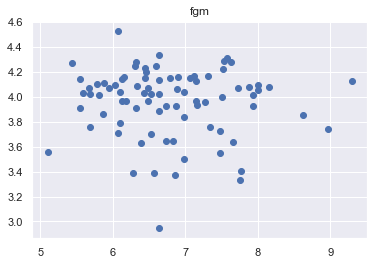

-0.06510227427358978


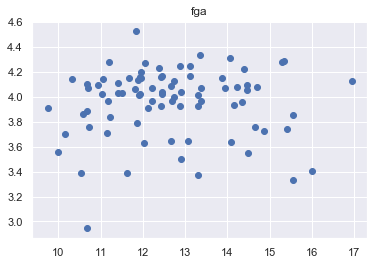

0.03001098562093195


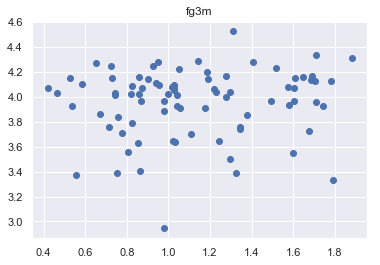

0.09996991071299577


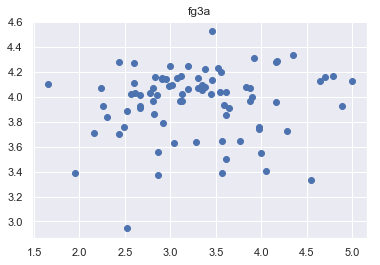

0.0925001412728031


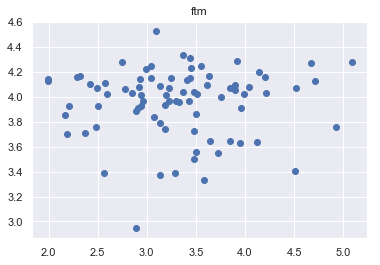

0.023116684166286396


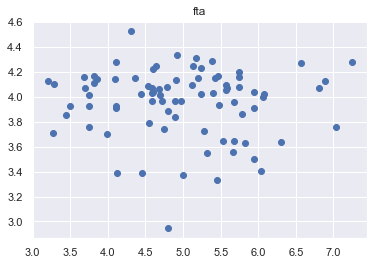

-0.04826691954738816


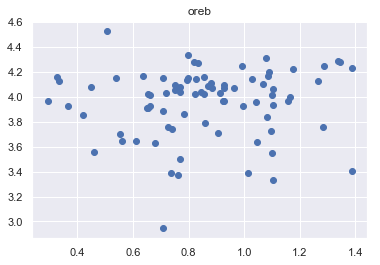

0.07387933821525747


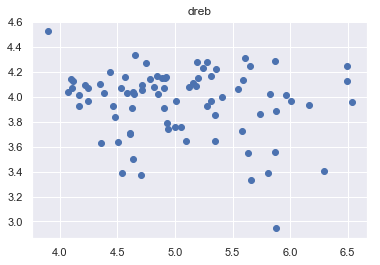

-0.17250780627057644


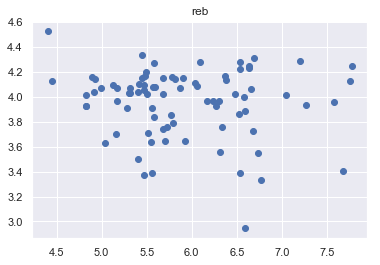

-0.1207842554360386


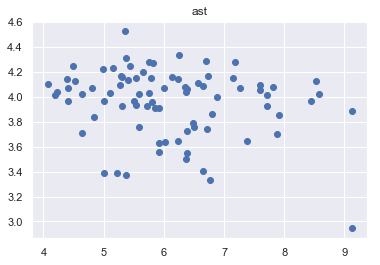

-0.21051159210541073


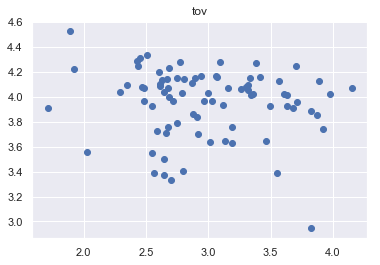

-0.11798269614065647


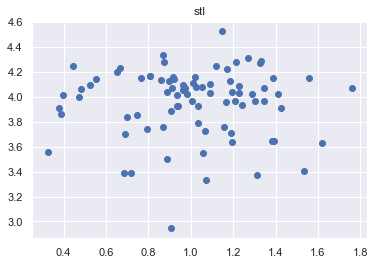

0.0006041384306447767


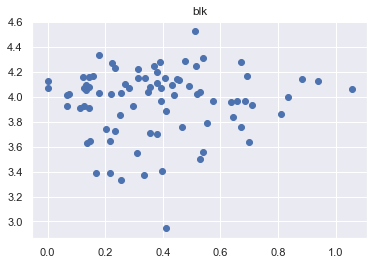

0.05370865705319549


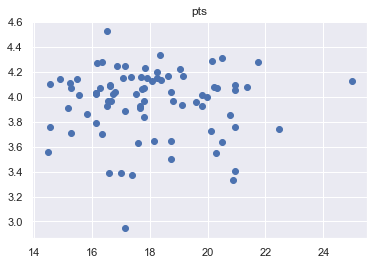

-0.026895408802315987


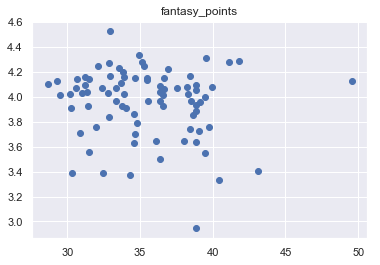

-0.1178436476150896


In [112]:
# plotting fantasy points by lebron to f(average stats over all the players from last season...)

features = ['fgm','fga','fg3m','fg3a','ftm','fta','oreb','dreb','reb','ast','tov','stl','blk','pts',"fantasy_points"]
for f in features:
    all_fp = []
    all_y =[]
    for gid,pid_list in new_table.items():
        fp = game_ids.loc[game_ids.game_id == gid].fantasy_points.values[0]

        fp_opp = []
        min_opp = []

        for pid in pid_list:
            x = df.loc[(df.player_id =='2544') & (df.player_vs_id == pid) & (df.season == '2016-17')]
            if len(x)>0 and x["min"].values[0] >0:
                fp_opp.append(x[f].values[0])
                min_opp.append(x["min"].values[0])

        y = np.ma.average(fp_opp,weights = min_opp)
#         print("/n",y, fp_opp, min_opp)
        all_fp.append(np.log(fp))
        all_y.append(y)

    plt.plot(all_y,all_fp,'o')
    plt.title(f)
    plt.show()
    print(pearsonr(all_y,all_fp)[0])


-0.10075247824855309
